In [41]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import (KMeans, DBSCAN, AffinityPropagation)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

In [42]:
data = load_wine()
X = pd.DataFrame(data=data.data, columns=data.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [43]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [44]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)
X_transform

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [45]:
kmeans_instance = KMeans(n_clusters=3, random_state=42)
kmeans_instance.fit(X_transform)
kmeans_instance.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [46]:
{
    "silhouette_score" : silhouette_score(X_transform, kmeans_instance.labels_),
    "calinski_harabasz_score" :calinski_harabasz_score(X_transform, kmeans_instance.labels_)
}

{'silhouette_score': 0.2848589191898987,
 'calinski_harabasz_score': 70.9400080031512}

In [47]:
from sklearn.metrics import rand_score, mutual_info_score
from sklearn.preprocessing import MaxAbsScaler

In [48]:
rand_score(data.target, kmeans_instance.labels_)

0.9542944201104552

In [49]:
my_pipeline = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("pca", PCA(n_components=5, random_state=42))
])

my_pipeline.fit(X)

,steps,"[('scaler', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'


In [50]:
X_transform_pca = my_pipeline.transform(X)
X_transform_pca

array([[ 5.00662308e-01,  1.34687825e-01,  1.90218849e-02,
         1.15461625e-02,  1.14027569e-02],
       [ 3.48097608e-01,  1.02096273e-02, -1.05168948e-01,
        -1.24831893e-01,  2.01196278e-01],
       [ 4.34528244e-01,  2.25163551e-01,  1.12679244e-01,
         9.01314058e-02, -4.47708900e-02],
       [ 6.09955053e-01,  4.59990745e-01,  4.86002004e-03,
         2.38551768e-02,  2.25656244e-02],
       [ 1.52154358e-01,  1.21196352e-02,  1.35502339e-01,
         1.43345649e-01,  3.39115633e-03],
       [ 4.62744248e-01,  3.53901132e-01, -1.23873670e-01,
         1.12107101e-01,  1.01099136e-01],
       [ 3.74528466e-01,  1.60044532e-01, -6.90914580e-02,
        -3.50184433e-03,  1.57291755e-01],
       [ 3.07408246e-01,  1.57333090e-01, -6.61010038e-02,
         4.44020044e-03,  2.70003209e-01],
       [ 3.62001721e-01,  1.03537904e-01, -9.47588799e-02,
        -2.63458082e-02,  3.18402839e-02],
       [ 4.66860543e-01,  1.70161905e-01, -8.00815199e-02,
        -7.96728605e-02

In [51]:
kmeans_instance_pca = KMeans(n_clusters=3, random_state=42)
kmeans_instance_pca.fit(X_transform_pca)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [52]:
{
    "silhouette_score" : silhouette_score(X_transform_pca, kmeans_instance_pca.labels_),
    "calinski_harabasz_score" :calinski_harabasz_score(X_transform_pca, kmeans_instance_pca.labels_)
}

{'silhouette_score': 0.35771647813129837,
 'calinski_harabasz_score': 125.94931198911144}

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data_1 = pd.DataFrame(data=my_pipeline.transform(X), columns=["p1", "p2", "p3", "p4", "p5"])
data_2 = pd.DataFrame(data=X_transform_pca, columns=["p1", "p2", "p3", "p4", "p5"])

data_1["cluster"] = kmeans_instance.labels_
data_2["cluster"] = kmeans_instance_pca.labels_

In [55]:
data_1["label"] = data.target
data_2["label"] = data.target

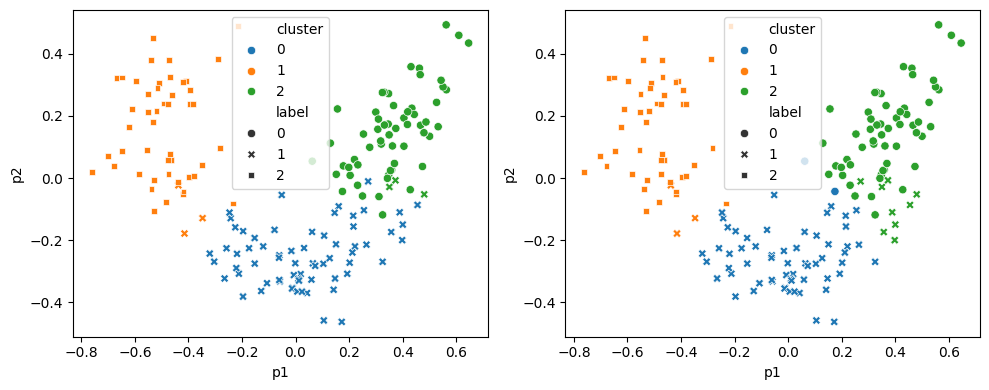

In [58]:
_, axis = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(data=data_1, x="p1", y="p2", hue="cluster", ax=axis[0], palette="tab10", style="label")
sns.scatterplot(data=data_2, x="p1", y="p2", hue="cluster", ax=axis[1], palette="tab10", style="label")

plt.tight_layout()

plt.savefig("demo.png", dpi=600)